1. 백만 개의 샘플을 가진 훈련 세트에서 (규제 없이) 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?

 = log($10^6$) 이므로 거의 20.

2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요, 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요?

= 지니 불순도 계산은  1 - 시그마 $p_ik$ 이므로 갈수록 작아 질 것. 

3. 결정 트리가 훈련 세트에 과대적합되었다면 max_depth를 줄이는 것이 좋을까요?

= 네, 복잡하기 때문에 복잡도를 줄여야 합니다.

4. 결정 트리가 훈련 세트에 과소적합되었다면 입력 특성의 스케일을 조정하는 것이 좋을까요?

= 상관없을 듯, 스케일을 조정하는건 복잡한 연산에서 실행하는 것이기 때문에.
정답은, 결정 트리에서 입력 특성의 스케일을 조정하는 것은 아예 낭비라고 판단함.

5. 백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데 한 시간이 걸렸다면, 천만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데는 대략 얼마나 걸릴까요?

= 결정 트리 훈련의 계산 복잡도는 $O(n * m * log(m)$ 이다. 그러므로 훈련 세트의 크기에 10을 곱하면 훈련 시간은 K = (n * 10m * log(10m))/(n * m * log(m)) = 10 * log(10m) / log(m). 만약 m = $10^6$ = 20 이면 K는 11.7정도 나옴

6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort=True로 지정하는 것이 훈련 속도를 높일까요?

= 아니요. 수천 개 미만일 때만 훈련 세트를 사전에 정렬하여 훈련 속도를 높일 수 있다.

7. moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요.  
    a. make_moons (n_samples=1000, noise=0.4 )를 사용해 데이터셋을 생성합니다.  
    b. 이를 train_test_split ( )을 사용해 훈련 세트와 테스트 세트로 나눕니다.  
    c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(GridSearchCV를 사용하면 됩니다). 힌트: 여러 가지 max_leaf_ nodes 값을 시도해보세요.  
    d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
Xm, ym = make_moons(n_samples=1000, noise=0.4, random_state=53)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, random_state=53)

print(Xm.shape)
print(ym.shape)
print(Xm_train.shape)
print(ym_train.shape)
print(Xm_test.shape)
deep_tree_clf = DecisionTreeClassifier(random_state=42)
parameters = {'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14], 'min_samples_leaf': [2,3,4,5,6,7,8,9,10,11,12]}
gs_cv = GridSearchCV(deep_tree_clf, param_grid=parameters)
gs_cv.fit(Xm_train, ym_train)


(1000, 2)
(1000,)
(750, 2)
(750,)
(250, 2)


/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [3]:
gs_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [4]:
gs_cv.best_score_

0.86

In [5]:
from matplotlib.colors import ListedColormap
import numpy as np
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

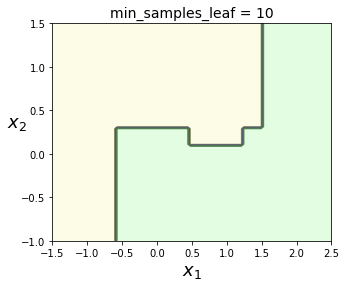

In [6]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(gs_cv, Xm_train, ym_train, axes=[-1.5, 2.5, -1, 1.5], iris=False, plot_training=False)
plt.title("min_samples_leaf = {}".format(gs_cv.best_params_['min_samples_leaf']), fontsize=14)

# save_fig("min_samples_leaf_plot")
plt.show()

8. 랜덤 포레스트를 만들어보세요.  
    a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다. 힌트: 사이킷런의 ShuffleSplit을 사용할 수있습니다.  
    b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트 세트로 이 1,000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.  
    c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 mode ( ) 함수를 사용할 수 있습니 다). 그러면 테스트 세트에 대한 다수결 예측 majority - vote prediction 이 만들어집니다.  
    d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5~1.5% 정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습 니다!  

In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [8]:
Xm, ym = make_moons(n_samples=100000, noise=0.4)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym)

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(Xm_train) - n_instances)
for mini_train_index, mini_test_index in rs.split(Xm_train):
    x_mini_train = Xm_train[mini_train_index]
    y_mini_train = ym_train[mini_train_index]
    mini_sets.append((x_mini_train, y_mini_train))

In [9]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score
# 각각 학습 시킨다.
forest = [clone(gs_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_prediction = tree.predict(Xm_test)
    accuracy_scores.append(accuracy_score(ym_test, y_prediction))
    
np.mean(accuracy_scores)

0.7892547599999999

c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 mode ( ) 함수를 사용할 수 있습니 다). 그러면 테스트 세트에 대한 다수결 예측 majority - vote prediction 이 만들어집니다.

In [10]:
y_pred = np.empty([n_trees, len(Xm_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    y_pred[tree_index] = tree.predict(Xm_test)

In [11]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(y_pred, axis=0)

d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5~1.5% 정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습니다!

In [12]:
accuracy_score(ym_test, y_pred_majority_votes.reshape([-1]))

0.82644